In [31]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\fproject\\dataset\\liver_patient.csv")

In [33]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
df.duplicated().sum()

587

In [35]:
df = df.drop_duplicates()

In [36]:
df.duplicated().sum()

0

In [37]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [38]:
df = df.dropna()

In [39]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [40]:
df = df.rename({'Dataset':'Result'},axis=1)

In [41]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
  df[i] = le.fit_transform(df[i]).astype(int)

In [43]:
df_sex = pd.get_dummies(df['Gender'])
df_new = pd.concat([df, df_sex], axis=1)
Droop_gender = df_new.drop(labels=['Gender' ],axis=1 )
Droop_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Male','Fmale','Result']

X = Droop_gender.drop('Result',axis=1)
y = Droop_gender['Result']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1,stratify = y)


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [45]:
input_shape = X_train.shape[1]
encoding_dim = 11

input_layer = tf.keras.Input(shape=(input_shape,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = tf.keras.layers.Dense(input_shape, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [46]:
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2818 - val_loss: 1.9609
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1761 - val_loss: 1.9346
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2080 - val_loss: 1.9065
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2399 - val_loss: 1.8804
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0922 - val_loss: 1.8551
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2064 - val_loss: 1.8284
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1793 - val_loss: 1.8033
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0517 - val_loss: 1.7807
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2047 - val_loss: 1.7572
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0318 - val_loss: 1.7366
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0802 - val_loss: 1.7160
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [47]:
encoder = tf.keras.Model(input_layer, encoded)
encoded_input = tf.keras.Input(shape=(encoding_dim,))
classifier_layer = tf.keras.layers.Dense(1, activation='sigmoid')(encoded_input)
classifier = tf.keras.Model(encoded_input, classifier_layer)

In [48]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(encoder.predict(X_train), y_train, epochs=100, batch_size=32, validation_data=(encoder.predict(X_test), y_test))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7964 - loss: 0.6730 - val_accuracy: 0.7688 - val_loss: 0.8247
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8118 - loss: 0.5787 - val_accuracy: 0.7919 - val_loss: 0.7961
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8002 - loss: 0.6017 - val_accuracy: 0.7977 - val_loss: 0.7688
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8033 - loss: 0.5763 - val_accuracy: 0.7977 - val_loss: 0.7418
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.6183 - val_accuracy: 0.7977 - val_loss: 0.7160
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 0.5850 - val_accuracy: 0.7977 - val_loss: 0.6920
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8305 - loss: 0.5490 - val_accuracy: 0.8035 - val_loss: 0.6701
Epoch 8/100
13/13 ━━━━━━━━━━━━━━

In [49]:
y_pred = classifier.predict(encoder.predict(X_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [50]:
y_pred = y_pred.round()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.88      0.94        42
        True       0.96      1.00      0.98       131

    accuracy                           0.97       173
   macro avg       0.98      0.94      0.96       173
weighted avg       0.97      0.97      0.97       173



In [52]:
print("Report")
accuracy = (accuracy_score(y_test,y_pred)*100)
print("Accuracy:", accuracy)

Report
Accuracy: 97.10982658959537


In [53]:
f1_score(y_test,y_pred)

0.9812734082397003

In [54]:
recall_score(y_test,y_pred,average='weighted')

0.9710982658959537

In [55]:
precision_score(y_test,y_pred)

0.9632352941176471

In [56]:
print("Confusion matrix")
cm2=confusion_matrix(y_test,y_pred)
print(cm2)

Confusion matrix
[[ 37   5]
 [  0 131]]


In [57]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity : ', sensitivity2 )

Sensitivity :  1.0


In [58]:
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ',specificity2)

Specificity :  0.8809523809523809


True Positive : 131
True Negative : 37
False Positive : 5
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.8809523809523809
False Positive Rate : 0.11904761904761904
False Negative Rate : 0.0

Positive Predictive Value : 0.9632352941176471
Negative predictive value : 1.0
Confusion matrix:
[[ 37   5]
 [  0 131]]


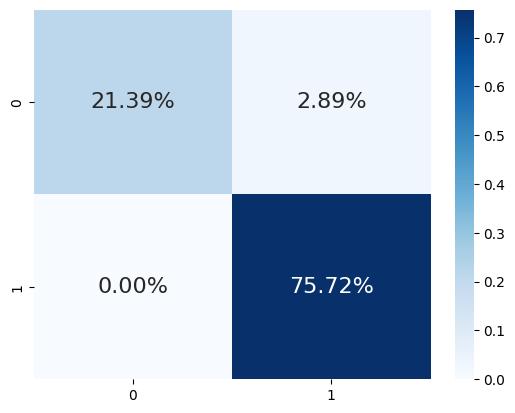

In [59]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm2)



sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

In [60]:
pickle.dump(classifier, open('Liver-AE.pkl', 'wb'))

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'